# Decision Trees Class Notes

#### Dataset represents the Social Network advertisement dataset.
The data contains userID, Gender, Age and Estimated Salary of the users. The target variable is 'Purchased'.
You have to predict wheter the person will Purchase the advertised item or not.

### Load the required Libraries

**Note: statsmodels is not available for decision trees**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load the Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Note:** 
- If you wish to plot the output graph, then grab the input and output into 2D numpy arrays as shown below.
- If you still wish to use Dataframe formats to get 'X' and 'Y' then you have to use Standard Scalar to plot your output.

In [4]:
#Grabing 'X' and 'y' in 2D numpy arrays
#X = dataset.iloc[:, [2, 3]].values
#y = dataset.iloc[:, 4].values

In [5]:
#Grabing 'X' and 'y' in DataFrame Format
#Note you have to do scaling here to plot the output
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [6]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
#X_no_df.shape

In [8]:
X.shape

(400, 2)

### Split the data set into training part and test part

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


### Standardization: Scaling the dataset

**Note:** Decision tree algorithm are **not based** on **'Euclidean Distance'**. Hence you **need not to apply Feature Scaling** to decision tree datasets.<br>

Generally, you apply Feature scaling only on the algorithms which are based on Euclidean Distance, like regression.<br>
Feature Scaling is optional here.<br>
- However, if we do no apply feature scaling, then you will not be able to plot the Training and Testing output with DataFrame. You'll get the error.<br>
- To avoid this, either you take 'X' and 'y' in 2D numpy array or do feature scaling of 'X' and 'y' DataFrames.

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Import the Decision Tree Classifier
Instantiate the classifier 

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

### Train the classifier

In [12]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Test/predict using the trained decision tree classifier

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Evaluation: 
#### Confusion Matrix: Get the confusion Matrix for the classifier

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [16]:
#Create DataFrame Out of it
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df.index = ['Actual 0','Actual 1']

In [17]:
cm_df

,Predicted 0,Predicted 1
Actual 0,62,6
Actual 1,3,29


#### Calculate Statistics based on Confusion Matrix

- TP = 62
- TN = 29
- FP = 6
- FN = 3
- Accuracy = (TP+TN)/Total : 
- Sensitivity/Recall = TP/(TP + FN): When it’s actually yes, how often does it predict yes? It deals with the actual positive scenerios
- Specificity = TN/(TN + FP): When it’s actually no, how often does it predict no? 
- Precision = TP/(TP + FP) : When it predicts yes, how often is it correct?
- Misclassification Rate = (Misclassified / Total Classifications) = (FP + FN)/(Total) : This is the opposite of accuracy
- F1 Score = 2 * (precision x recall) / (precision + recall) <br>
It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.<br>
**F1-score = 1 Best (Perfect Precision & Recall)**<br>
**F1-score = 0 Worst (Worst Precision & Recall)**<br><br>

- Accuracy and Misclassification rate are opposite of each other
- Recall/Sensitivity & Specificity are opposite of each other

#### Classification Report

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


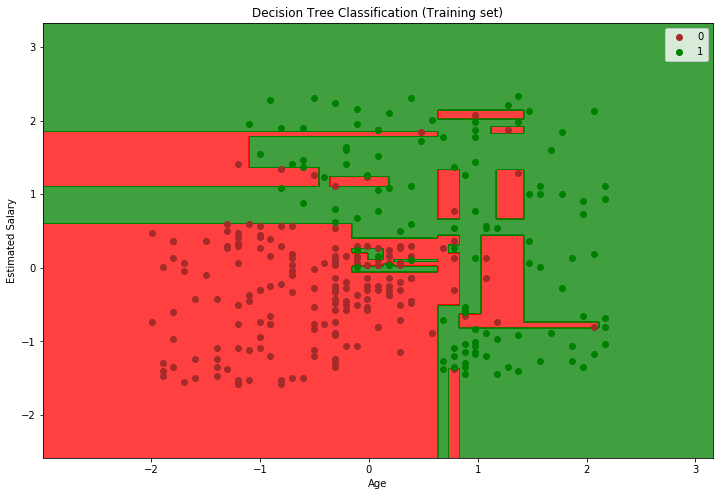

In [21]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,8))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('brown', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()

### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


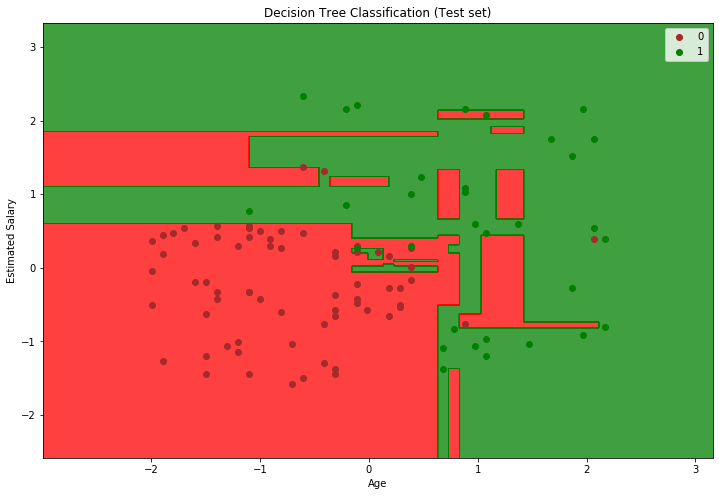

In [22]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,8))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('brown', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Further Assignment for home: Just try
- Assignment 1: Encode the Gender column and retrain and predict using decision tree classifier
- Assignment 2: Classify the same dataset with Logistic Regeression and see the preformance
- Assignment 3: For all the logistic regression datasets, perform the Decision Tree Classification